# Introduction: Interacting with Slack from Python

In this notebook, we will use `Slacker` to interact with Slack. This allows us to send messages and upload files, which can be useful when training models, or monitoring scripts (or just for fun of course)!

In [1]:
!pip install -q -U Slacker

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/slacker/
cloudfoundry-client 0.0.25 has requirement protobuf==2.6.1, but you'll have protobuf 3.6.1 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

# Slacker 
from slacker import Slacker

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Get a Slack Legacy API Token

https://api.slack.com/custom-integrations/legacy-tokens

Store in a safe location (not on GitHub)!

## Authenticate with Slack

Read in slack api token. Replace the line below with the location of your slack api token.

In [3]:
with open('C:/Users/willk/OneDrive/Desktop/slack_api_python.txt', 'r') as f:
    slack_api_token = f.read()

Authenticate with slack and print out channels to make sure everything worked.

In [4]:
# Connect to Slack
slack = Slacker(slack_api_token)
channels = slack.channels.list()

for channel in channels.body['channels']:
    print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]} ID: {channel["id"]}\n')

Channel general Purpose: This channel is for workspace-wide communication and announcements. All members are in this channel. ID: CCCT28F08

Channel python_content Purpose:  ID: CCEG5VCEM

Channel python_content2 Purpose:  ID: CCEBQSWHW

Channel random Purpose: A place for non-work-related flimflam, faffing, hodge-podge or jibber-jabber you'd prefer to keep out of more focused work-related channels. ID: CCDP3ES85

Channel slack_interaction Purpose: To interact with Slack from Python ID: CCDC464LU

Channel testing_exp Purpose: Experimental testing of interactions. ID: CCD27690R



# Options

Anything you can do in Slack itself, you can do with `Slacker`. Let's take a look at the options.

In [39]:
from pprint import pprint

command_dict = {'functions': {},
                'attributes': {}}

# Modules
for d in dir(slack):
    if not d.startswith('_'):
        command_dict['functions'][d] = []
        command_dict['attributes'][d] = []
        # Iterate through methods and attributes
        for dd in dir(getattr(slack, d)):
            if not dd.startswith('_'):
                # List of methods and attributes
                l = dir(getattr(getattr(slack, d), dd))
                # Method (function)
                if '__call__' in l:
                    command_dict['functions'][d].append(dd)
                # Attributes
                else:
                    command_dict['attributes'][d].append(dd)
                    
pprint(command_dict['functions']['users'])

['get',
 'get_presence',
 'get_user_id',
 'identity',
 'info',
 'list',
 'post',
 'set_active',
 'set_presence']


Let's see how to use one of these. Here we'll list the users and some information.

In [88]:
r = slack.users.list()
for member in r.body['members']:
    print(f"Real name: {member['real_name']:12} Time Zone: {member['tz']} Status: {member['profile']['status_text']}")

Real name: Will Koehrsen Time Zone: America/New_York Status: Running
Real name: slackbot     Time Zone: None Status: 


`r` is a response object. For each method, there will be different pieces of information you can retrieve.

In [60]:
r.body['members'][0]['profile']['image_original']

'https://avatars.slack-edge.com/2018-08-22/421515326835_af6fa36ec0b3f86e86ae_original.jpg'

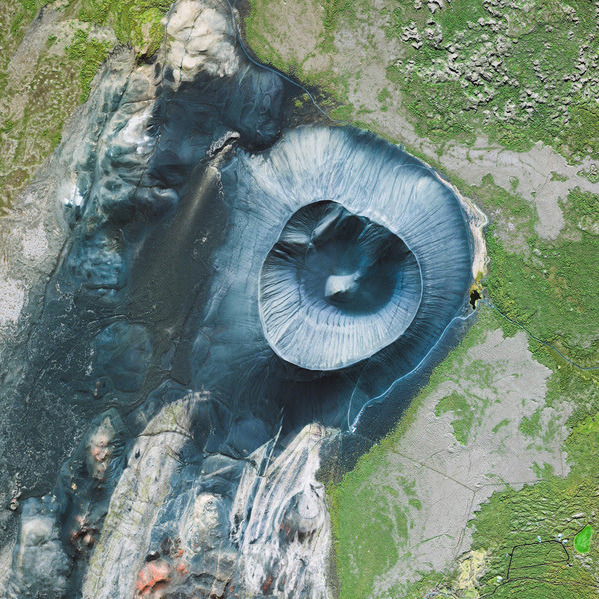

In [65]:
from IPython.display import Image

Image(url='https://avatars.slack-edge.com/2018-08-22/421515326835_af6fa36ec0b3f86e86ae_original.jpg', embed=True)

Of course, we can change this image if we aren't happy with it! 

In [82]:
r.body

{'ok': True,
 'members': [{'id': 'UCEKVNHPH',
   'team_id': 'TCD256PSM',
   'name': 'wjk68',
   'deleted': False,
   'color': '9f69e7',
   'real_name': 'Will Koehrsen',
   'tz': 'America/New_York',
   'tz_label': 'Eastern Standard Time',
   'tz_offset': -18000,
   'profile': {'title': 'Keep things running smoothly',
    'phone': '',
    'skype': '',
    'real_name': 'Will Koehrsen',
    'real_name_normalized': 'Will Koehrsen',
    'display_name': 'willk',
    'display_name_normalized': 'willk',
    'status_text': 'Running',
    'status_emoji': ':runner:',
    'status_expiration': 0,
    'avatar_hash': 'af6fa36ec0b3',
    'image_original': 'https://avatars.slack-edge.com/2018-08-22/421515326835_af6fa36ec0b3f86e86ae_original.jpg',
    'email': 'wjk68@case.edu',
    'first_name': 'Will',
    'last_name': 'Koehrsen',
    'image_24': 'https://avatars.slack-edge.com/2018-08-22/421515326835_af6fa36ec0b3f86e86ae_24.jpg',
    'image_32': 'https://avatars.slack-edge.com/2018-08-22/421515326835_a

In [80]:
slack.users.get_user_id('Will Koehrsen')

In [73]:
w = slack.users

In [85]:
r = w.profile.set(user='UCEKVNHPH', name='display_name', value = '123')

In [87]:
r.successful

True

In [30]:
slack.channels.create('python_content2')
new_id = slack.channels.get_channel_id('python_content2')
r = slack.channels.history(new_id)

In [31]:
r.body

{'has_more': False,
 'messages': [{'subtype': 'channel_join',
   'text': '<@UCEKVNHPH> has joined the channel',
   'ts': '1535161714.000200',
   'type': 'message',
   'user': 'UCEKVNHPH'}],
 'ok': True}

In [32]:
slack.channels.get_channel_id('random')

'CCDP3ES85'

In [33]:
slack.chat.post_message('random', 'Using no id')

In [34]:
slack.chat.post_message(slack.channels.get_channel_id('random'), 'Using an id')

In [9]:
slack.channels.set_purpose('#testing_exp', 'Deep philosophical discussions around the water cooler.')
slack.channels.create('python_content')
slack.channels.set_purpose('python_content', 'Sharing great python related resources')

channels = slack.channels.list()

for channel in channels.body['channels']:
    print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]}\n')

Error: channel_not_found

In [ ]:
from PIL import Image
import requests
url = user['profile']['image_192']
im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)

In [ ]:
PIL.Image.from

In [ ]:
from IPython.display import Image
from PIL import Image
import PIL
users = slack.users.list()

for user in users.body['members']:
    # Print some information
    print(f'\nUser: {user["name"]}, Real Name: {user["real_name"]}, Time Zone: {user["tz_label"]}.')
    print(f'Current Status: {user["profile"]["status_text"]}')
    # Get image data and show
    plt.figure(facecolor = 'w')
    plt.imshow(Image.open(requests.get(user['profile']['image_192'], stream=True).raw))
    plt.axis('off');
    plt.grid('off');
    plt.show();

In [ ]:
plt.plot(np.random.randn(100), np.random.randn(100), 'ro')
plt.savefig('first_plot.png')

In [ ]:
slack.files.upload('first_plot.png', channels = ['testing_exp', 'slack_interaction']);

In [ ]:
Image(user['profile']['image_192'])

In [ ]:

Image('https://secure.gravatar.com/avatar/f85b7564fd35d5c86054b95090052d94.jpg?s=192&d=https%3A%2F%2Fa.slack-edge.com%2F7fa9%2Fimg%2Favatars%2Fava_0025-192.png')

In [ ]:
users.body['members']

In [ ]:
x = slack.channels.list()

In [ ]:
x.body